In [620]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [621]:
country=pd.read_csv(r'..\data\Base_Paper\African GDP\DEM_COUNTRY.csv')
country.head()

,COUNTRY_ID,COUNTRY_NAME_EN
0,AFG,Afghanistan
1,ALB,Albania
2,DZA,Algeria
3,ASM,American Samoa
4,AND,Andorra


In [622]:
country[country['COUNTRY_ID']=='ABW']

,COUNTRY_ID,COUNTRY_NAME_EN
10,ABW,Aruba


In [623]:
label= pd.read_csv(r'..\data\Base_Paper\African GDP\DEM_LABEL.csv')
label.head()

,INDICATOR_ID,INDICATOR_LABEL_EN
0,200101,Total population (thousands)
1,200144,Population aged 15-24 years (thousands)
2,200151,Population aged 65 years or older (thousands)
3,200343,Population aged 14 years or younger (thousands)
4,200345,Population aged 25-64 years (thousands)


In [624]:
label['INDICATOR_ID'].unique()

array(['200101', '200144', '200151', '200343', '200345',
       'DT.TDS.DECT.GN.ZS', 'NY.GDP.DEFL.ZS', 'NY.GDP.MKTP.CD',
       'NY.GDP.MKTP.CN', 'NY.GDP.MKTP.KD  ', 'NY.GDP.MKTP.KD.ZG',
       'NY.GDP.MKTP.KN', 'NY.GDP.MKTP.PP.CD', 'NY.GDP.MKTP.PP.KD',
       'NY.GDP.PCAP.CD', 'NY.GDP.PCAP.CN', 'NY.GDP.PCAP.PP.CD',
       'NY.GDP.PCAP.PP.KD', 'NY.GNP.MKTP.CN', 'NY.GNP.PCAP.CD',
       'NY.GNP.PCAP.CN', 'NY.GNP.PCAP.PP.CD', 'PA.NUS.ATLS ',
       'PA.NUS.FCRF', 'PA.NUS.PPP', 'PA.NUS.PPPC.RF', 'PA.NUS.PRVT.PP',
       'SH.DYN.AIDS.ZS', 'SI.POV.LMIC', 'SP.DYN.IMRT.IN',
       'SP.DYN.LE00.IN', 'SP.DYN.TFRT.IN', 'SP.POP.GROW',
       'SP.RUR.TOTL.ZS', 'XTGOV.IMF'], dtype=object)

In [625]:
values= pd.read_csv(r'..\data\Base_Paper\African GDP\DEM_DATA_NATIONAL.csv')
values.head()

,INDICATOR_ID,COUNTRY_ID,YEAR,VALUE,MAGNITUDE,QUALIFIER
0,200101,ABW,1970,59.240,NaN,NaN
1,200101,ABW,1971,58.973,NaN,NaN
2,200101,ABW,1972,58.660,NaN,NaN
3,200101,ABW,1973,59.051,NaN,NaN
4,200101,ABW,1974,59.680,NaN,NaN


In [626]:
values.isna().sum()

INDICATOR_ID         0
COUNTRY_ID           0
YEAR                 0
VALUE                0
MAGNITUDE       303553
QUALIFIER       303553
dtype: int64

In [627]:
country = country.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)
label = label.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)
values = values.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

In [628]:
# merge the data
data=pd.merge(values,label,how='left',on='INDICATOR_ID')
data=pd.merge(data,country,how='left',on='COUNTRY_ID')
data.head()

,INDICATOR_ID,COUNTRY_ID,YEAR,VALUE,MAGNITUDE,QUALIFIER,INDICATOR_LABEL_EN,COUNTRY_NAME_EN
0,200101,ABW,1970,59.240,NaN,NaN,Total population (thousands),Aruba
1,200101,ABW,1971,58.973,NaN,NaN,Total population (thousands),Aruba
2,200101,ABW,1972,58.660,NaN,NaN,Total population (thousands),Aruba
3,200101,ABW,1973,59.051,NaN,NaN,Total population (thousands),Aruba
4,200101,ABW,1974,59.680,NaN,NaN,Total population (thousands),Aruba


In [629]:
data.shape

(303553, 8)

In [630]:
data.columns

Index(['INDICATOR_ID', 'COUNTRY_ID', 'YEAR', 'VALUE', 'MAGNITUDE', 'QUALIFIER',
       'INDICATOR_LABEL_EN', 'COUNTRY_NAME_EN'],
      dtype='object')

In [631]:
data.isna().sum()

INDICATOR_ID               0
COUNTRY_ID                 0
YEAR                       0
VALUE                      0
MAGNITUDE             303553
QUALIFIER             303553
INDICATOR_LABEL_EN         0
COUNTRY_NAME_EN            0
dtype: int64

In [632]:
# find the indicator id with missing indicator name
data[data['INDICATOR_LABEL_EN'].isna()]['INDICATOR_ID'].unique()

array([], dtype=object)

In [633]:
data.drop(['INDICATOR_ID','COUNTRY_ID','MAGNITUDE', 'QUALIFIER'],axis=1,inplace=True)
data.head()

,YEAR,VALUE,INDICATOR_LABEL_EN,COUNTRY_NAME_EN
0,1970,59.240,Total population (thousands),Aruba
1,1971,58.973,Total population (thousands),Aruba
2,1972,58.660,Total population (thousands),Aruba
3,1973,59.051,Total population (thousands),Aruba
4,1974,59.680,Total population (thousands),Aruba


In [634]:
african_countries = ["Algeria","Chad","Congo","Egypt","Ethiopia","Ghana","Guinea","Kenya","Madagascar","Mauritius","Morocco","Namibia","Nigeria","Senegal","Seychelles","South Africa","Sudan","Uganda","Zambia","Zimbabwe",
]

In [635]:
# filter the data to only include African countries
data = data[data['COUNTRY_NAME_EN'].isin(african_countries)]
data.shape

(31305, 4)

In [636]:
data['COUNTRY_NAME_EN'].unique()

array(['Congo', 'Algeria', 'Egypt', 'Ethiopia', 'Ghana', 'Guinea',
       'Kenya', 'Morocco', 'Madagascar', 'Mauritius', 'Namibia',
       'Nigeria', 'Sudan', 'Senegal', 'Seychelles', 'Chad', 'Uganda',
       'South Africa', 'Zambia', 'Zimbabwe'], dtype=object)

In [637]:
data['INDICATOR_LABEL_EN'].unique()

array(['Total population (thousands)',
       'Population aged 15-24 years (thousands)',
       'Population aged 65 years or older (thousands)',
       'Population aged 14 years or younger (thousands)',
       'Population aged 25-64 years (thousands)',
       'Total debt service (% of GNI)',
       'GDP deflator (base year varies by country)', 'GDP (current US$)',
       'GDP (current LCU)', 'GDP at market prices (constant 2010 US$)',
       'GDP growth (annual %)', 'GDP (constant LCU)',
       'GDP, PPP (current international $)',
       'GDP, PPP (constant 2011 international $)',
       'GDP per capita (current US$)', 'GDP per capita (current LCU)',
       'GDP per capita, PPP (current international $)',
       'GDP per capita, PPP (constant 2011 international $)',
       'GNI (current LCU)', 'GNI per capita, Atlas method (current US$)',
       'GNI per capita (current LCU)',
       'GNI per capita, PPP (current international $)',
       'DEC alternative conversion factor (LCU per US

In [638]:
data.isna().sum()

YEAR                  0
VALUE                 0
INDICATOR_LABEL_EN    0
COUNTRY_NAME_EN       0
dtype: int64

In [639]:
data = data[data['INDICATOR_LABEL_EN'].str.contains('GDP|GNI|PPP')]
data.shape

(17323, 4)

In [640]:
data.head()

,YEAR,VALUE,INDICATOR_LABEL_EN,COUNTRY_NAME_EN
62862,1970,3.29126,Total debt service (% of GNI),Congo
62863,1971,2.74336,Total debt service (% of GNI),Congo
62864,1972,1.90280,Total debt service (% of GNI),Congo
62865,1973,2.31616,Total debt service (% of GNI),Congo
62866,1974,3.23528,Total debt service (% of GNI),Congo


In [641]:
# reset the index
data.reset_index(drop=True,inplace=True)
data.head()

,YEAR,VALUE,INDICATOR_LABEL_EN,COUNTRY_NAME_EN
0,1970,3.29126,Total debt service (% of GNI),Congo
1,1971,2.74336,Total debt service (% of GNI),Congo
2,1972,1.90280,Total debt service (% of GNI),Congo
3,1973,2.31616,Total debt service (% of GNI),Congo
4,1974,3.23528,Total debt service (% of GNI),Congo


In [642]:
data.shape

(17323, 4)

In [643]:
# filter year 1990 to 2019
data = data[(data['YEAR']>=1990) & (data['YEAR']<=2019)]

In [644]:
data.shape

(11985, 4)

In [645]:
data.columns

Index(['YEAR', 'VALUE', 'INDICATOR_LABEL_EN', 'COUNTRY_NAME_EN'], dtype='object')

In [646]:
# put 'COUNTRY_NAME_EN' as 1st column, 'YEAR' as second column unique values in 'INDICATOR_LABEL_EN' as columns and 'VALUE' as values
data = data.pivot_table(index=['COUNTRY_NAME_EN','YEAR'],columns='INDICATOR_LABEL_EN',values='VALUE').reset_index()
data.head()

INDICATOR_LABEL_EN,COUNTRY_NAME_EN,YEAR,GDP (constant LCU),GDP (current LCU),GDP (current US$),GDP at market prices (constant 2010 US$),GDP deflator (base year varies by country),GDP growth (annual %),GDP per capita (current LCU),GDP per capita (current US$),...,"GDP, PPP (current international $)",GNI (current LCU),GNI per capita (current LCU),"GNI per capita, Atlas method (current US$)","GNI per capita, PPP (current international $)","PPP conversion factor, GDP (LCU per international $)","PPP conversion factor, private consumption (LCU per international $)",Poverty headcount ratio at $3.20 a day (PPP) (% of population),Price level ratio of PPP conversion factor (GDP) to market exchange rate,Total debt service (% of GNI)
0,Algeria,1990,8.696112e+12,5.558000e+11,6.204851e+10,8.047063e+10,6.39136,0.8,21780.64076,2431.55127,...,1.779650e+11,5.354850e+11,20984.53836,2390.0,6720.0,3.12309,8.05644,NaN,0.34866,14.73460
1,Algeria,1991,8.591759e+12,8.445000e+11,4.571568e+10,7.950498e+10,9.82919,-1.2,32314.34323,1749.28609,...,1.817755e+11,7.974380e+11,30513.54079,2000.0,6570.0,4.64584,9.72990,NaN,0.25150,21.24649
2,Algeria,1992,8.746411e+12,1.048200e+12,4.800313e+10,8.093607e+10,11.98434,1.8,39187.53350,1794.62351,...,1.892646e+11,1.001034e+12,37424.21568,1920.0,6760.0,5.53828,12.43471,NaN,0.25363,20.35746
3,Algeria,1993,8.562736e+12,1.166000e+12,4.994559e+10,7.923641e+10,13.61714,-2.1,42625.79726,1825.87512,...,1.896820e+11,1.125146e+12,41132.29498,1750.0,6690.0,6.14713,14.55910,NaN,0.26331,18.87253
4,Algeria,1994,8.485672e+12,1.491500e+12,4.254318e+10,7.852329e+10,17.57669,-0.9,53387.96890,1522.82521,...,1.919890e+11,1.430679e+12,51210.88151,1640.0,6590.0,7.76868,18.31074,NaN,0.22159,12.53818


In [647]:
data.isna().sum()

INDICATOR_LABEL_EN
COUNTRY_NAME_EN                                                               0
YEAR                                                                          0
GDP (constant LCU)                                                            0
GDP (current LCU)                                                             0
GDP (current US$)                                                             0
GDP at market prices (constant 2010 US$)                                      0
GDP deflator (base year varies by country)                                    0
GDP growth (annual %)                                                         0
GDP per capita (current LCU)                                                  0
GDP per capita (current US$)                                                  0
GDP per capita, PPP (constant 2011 international $)                           0
GDP per capita, PPP (current international $)                                 0
GDP, PPP (constant 20

In [648]:
data.columns

Index(['COUNTRY_NAME_EN', 'YEAR', 'GDP (constant LCU)', 'GDP (current LCU)',
       'GDP (current US$)', 'GDP at market prices (constant 2010 US$)',
       'GDP deflator (base year varies by country)', 'GDP growth (annual %)',
       'GDP per capita (current LCU)', 'GDP per capita (current US$)',
       'GDP per capita, PPP (constant 2011 international $)',
       'GDP per capita, PPP (current international $)',
       'GDP, PPP (constant 2011 international $)',
       'GDP, PPP (current international $)', 'GNI (current LCU)',
       'GNI per capita (current LCU)',
       'GNI per capita, Atlas method (current US$)',
       'GNI per capita, PPP (current international $)',
       'PPP conversion factor, GDP (LCU per international $)',
       'PPP conversion factor, private consumption (LCU per international $)',
       'Poverty headcount ratio at $3.20 a day (PPP) (% of population)',
       'Price level ratio of PPP conversion factor (GDP) to market exchange rate',
       'Total debt se

In [649]:
data.shape

(600, 23)

In [650]:
# for each country how many missing values are there    
data.isna().sum(axis=1)

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    0
598    2
599    1
Length: 600, dtype: int64

In [651]:
data.describe()

INDICATOR_LABEL_EN,YEAR,GDP (constant LCU),GDP (current LCU),GDP (current US$),GDP at market prices (constant 2010 US$),GDP deflator (base year varies by country),GDP growth (annual %),GDP per capita (current LCU),GDP per capita (current US$),"GDP per capita, PPP (constant 2011 international $)",...,"GDP, PPP (current international $)",GNI (current LCU),GNI per capita (current LCU),"GNI per capita, Atlas method (current US$)","GNI per capita, PPP (current international $)","PPP conversion factor, GDP (LCU per international $)","PPP conversion factor, private consumption (LCU per international $)",Poverty headcount ratio at $3.20 a day (PPP) (% of population),Price level ratio of PPP conversion factor (GDP) to market exchange rate,Total debt service (% of GNI)
count,600.000000,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02,600.000000,600.000000,6.000000e+02,600.000000,600.000000,...,6.000000e+02,6.000000e+02,6.000000e+02,600.000000,600.000000,600.000000,549.000000,100.000000,600.000000,536.000000
mean,2004.500000,9.638390e+12,7.749239e+12,5.241132e+10,6.394175e+10,119.193576,3.920250,3.619484e+05,2205.881993,5782.761056,...,1.407132e+11,7.505637e+12,3.476850e+05,2112.133333,4852.516667,181.391375,184.568644,58.041000,0.407918,4.339724
std,8.662663,1.848065e+13,2.019616e+13,9.355758e+10,9.803531e+10,522.236717,4.492738,9.266317e+05,2817.293732,5428.873720,...,2.263350e+11,1.960332e+13,9.006343e+05,2713.356092,4840.857603,462.447992,470.462501,26.123217,0.137348,5.971472
min,1990.000000,8.207306e+09,1.133400e+08,3.921636e+08,6.196547e+08,0.281670,-17.668950,5.858190e+00,110.460870,598.922750,...,6.225690e+08,1.036808e+08,5.386080e+00,110.000000,340.000000,0.003850,0.004020,1.200000,0.118400,0.027130
25%,1997.000000,1.457400e+11,6.939046e+10,5.834518e+09,7.919632e+09,22.729000,2.207802,8.641822e+03,471.075165,2067.710690,...,1.676701e+10,6.815047e+10,8.240131e+03,440.000000,1630.000000,2.056830,3.068850,38.950000,0.305245,1.124408
50%,2004.500000,2.261492e+12,8.473664e+11,1.238425e+10,1.694363e+10,58.139325,4.020615,5.273232e+04,1133.270810,3649.848485,...,3.525567e+10,8.108540e+11,5.118175e+04,1030.000000,2875.000000,7.793425,9.326780,64.700000,0.409770,2.610675
75%,2012.000000,9.177515e+12,5.205004e+12,5.022814e+10,7.870157e+10,100.000000,6.042797,3.756667e+05,2651.548468,8076.118922,...,1.702890e+11,4.960617e+12,3.355745e+05,2547.500000,6575.000000,171.543465,233.843050,78.725000,0.502757,5.060805
max,2019.000000,1.227866e+14,1.456391e+14,5.741838e+11,5.093718e+11,9394.987410,33.629370,9.587047e+06,16851.119760,29190.550260,...,1.297061e+12,1.408711e+14,9.176264e+06,16140.000000,28430.000000,3613.550190,3704.845440,96.900000,1.011780,73.284270


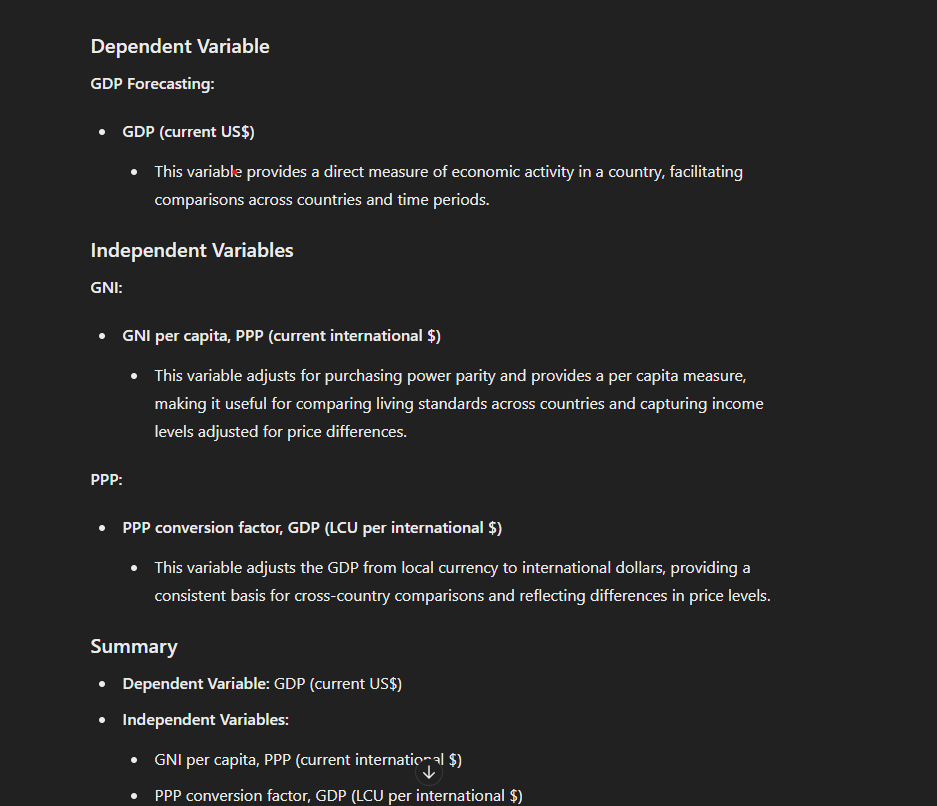

In [652]:
data.columns

Index(['COUNTRY_NAME_EN', 'YEAR', 'GDP (constant LCU)', 'GDP (current LCU)',
       'GDP (current US$)', 'GDP at market prices (constant 2010 US$)',
       'GDP deflator (base year varies by country)', 'GDP growth (annual %)',
       'GDP per capita (current LCU)', 'GDP per capita (current US$)',
       'GDP per capita, PPP (constant 2011 international $)',
       'GDP per capita, PPP (current international $)',
       'GDP, PPP (constant 2011 international $)',
       'GDP, PPP (current international $)', 'GNI (current LCU)',
       'GNI per capita (current LCU)',
       'GNI per capita, Atlas method (current US$)',
       'GNI per capita, PPP (current international $)',
       'PPP conversion factor, GDP (LCU per international $)',
       'PPP conversion factor, private consumption (LCU per international $)',
       'Poverty headcount ratio at $3.20 a day (PPP) (% of population)',
       'Price level ratio of PPP conversion factor (GDP) to market exchange rate',
       'Total debt se

In [653]:
data= data[['COUNTRY_NAME_EN', 'YEAR',
       'GDP (current US$)', 
       'GNI per capita, PPP (current international $)',
       'PPP conversion factor, GDP (LCU per international $)']]
data.head()

INDICATOR_LABEL_EN,COUNTRY_NAME_EN,YEAR,GDP (current US$),"GNI per capita, PPP (current international $)","PPP conversion factor, GDP (LCU per international $)"
0,Algeria,1990,6.204851e+10,6720.0,3.12309
1,Algeria,1991,4.571568e+10,6570.0,4.64584
2,Algeria,1992,4.800313e+10,6760.0,5.53828
3,Algeria,1993,4.994559e+10,6690.0,6.14713
4,Algeria,1994,4.254318e+10,6590.0,7.76868


In [654]:
# rename to COUNTRY, YEAR, GDP, GNI, PPP
data.columns=['COUNTRY', 'YEAR', 'GDP', 'GNI', 'PPP']
data.head()

,COUNTRY,YEAR,GDP,GNI,PPP
0,Algeria,1990,6.204851e+10,6720.0,3.12309
1,Algeria,1991,4.571568e+10,6570.0,4.64584
2,Algeria,1992,4.800313e+10,6760.0,5.53828
3,Algeria,1993,4.994559e+10,6690.0,6.14713
4,Algeria,1994,4.254318e+10,6590.0,7.76868


In [655]:
# # put country in column, year in index values as gni
# data = data.pivot_table(index='YEAR',columns='COUNTRY')
# data.head(31)

In [656]:
# data.isna().sum()

In [657]:
data.to_csv(r'..\data\Base_Paper\African GDP\Final_African_GDP.csv',index=False)

In [658]:
data.head()

,COUNTRY,YEAR,GDP,GNI,PPP
0,Algeria,1990,6.204851e+10,6720.0,3.12309
1,Algeria,1991,4.571568e+10,6570.0,4.64584
2,Algeria,1992,4.800313e+10,6760.0,5.53828
3,Algeria,1993,4.994559e+10,6690.0,6.14713
4,Algeria,1994,4.254318e+10,6590.0,7.76868


In [659]:
data.shape

(600, 5)

In [660]:
data.describe()

,YEAR,GDP,GNI,PPP
count,600.000000,6.000000e+02,600.000000,600.000000
mean,2004.500000,5.241132e+10,4852.516667,181.391375
std,8.662663,9.355758e+10,4840.857603,462.447992
min,1990.000000,3.921636e+08,340.000000,0.003850
25%,1997.000000,5.834518e+09,1630.000000,2.056830
50%,2004.500000,1.238425e+10,2875.000000,7.793425
75%,2012.000000,5.022814e+10,6575.000000,171.543465
max,2019.000000,5.741838e+11,28430.000000,3613.550190


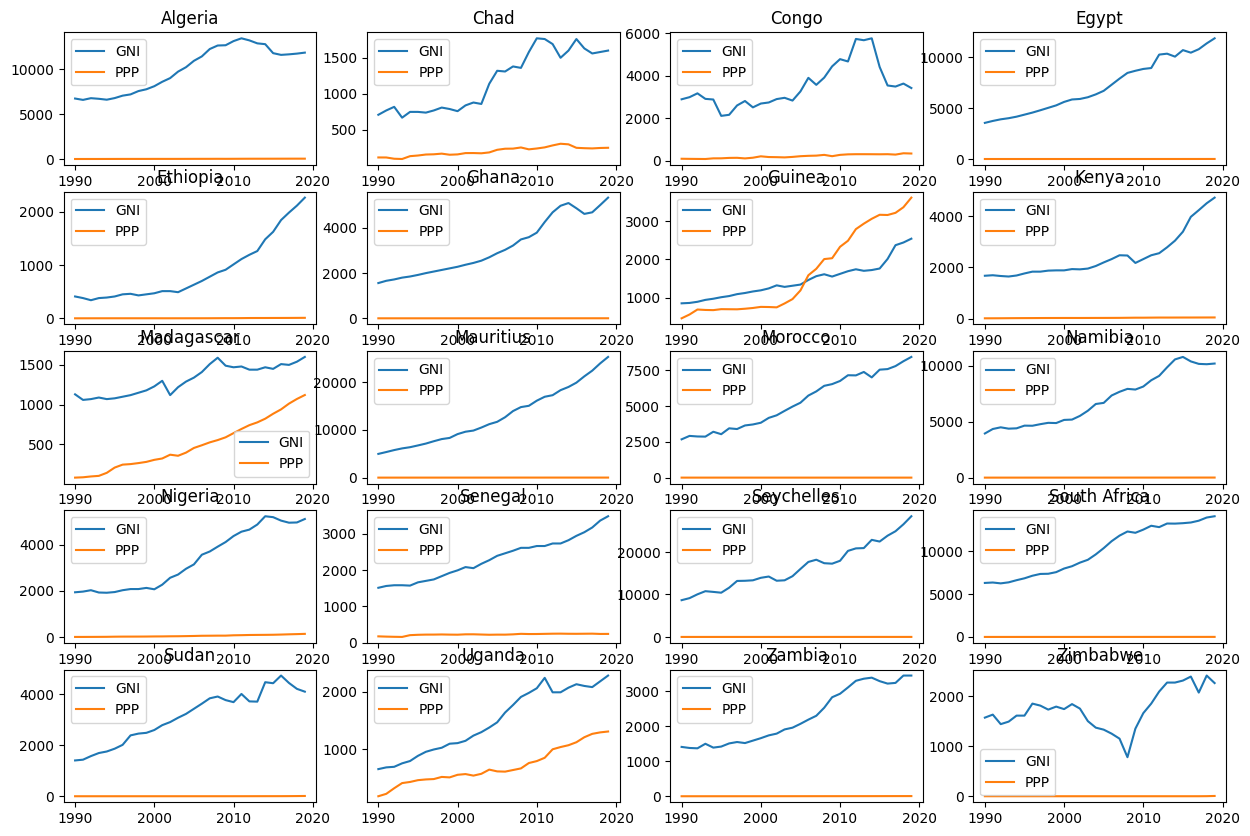

In [662]:
# for each country plot the GDP, GNI, PPP in separate plots
plt.figure(figsize=(15,10))
for i,country in enumerate(data['COUNTRY'].unique()):
    plt.subplot(5,4,i+1)
    temp = data[data['COUNTRY']==country]
    # plt.plot(temp['YEAR'],temp['GDP'],label='GDP')
    plt.plot(temp['YEAR'],temp['GNI'],label='GNI')
    plt.plot(temp['YEAR'],temp['PPP'],label='PPP')
    plt.title(country)
    plt.legend()

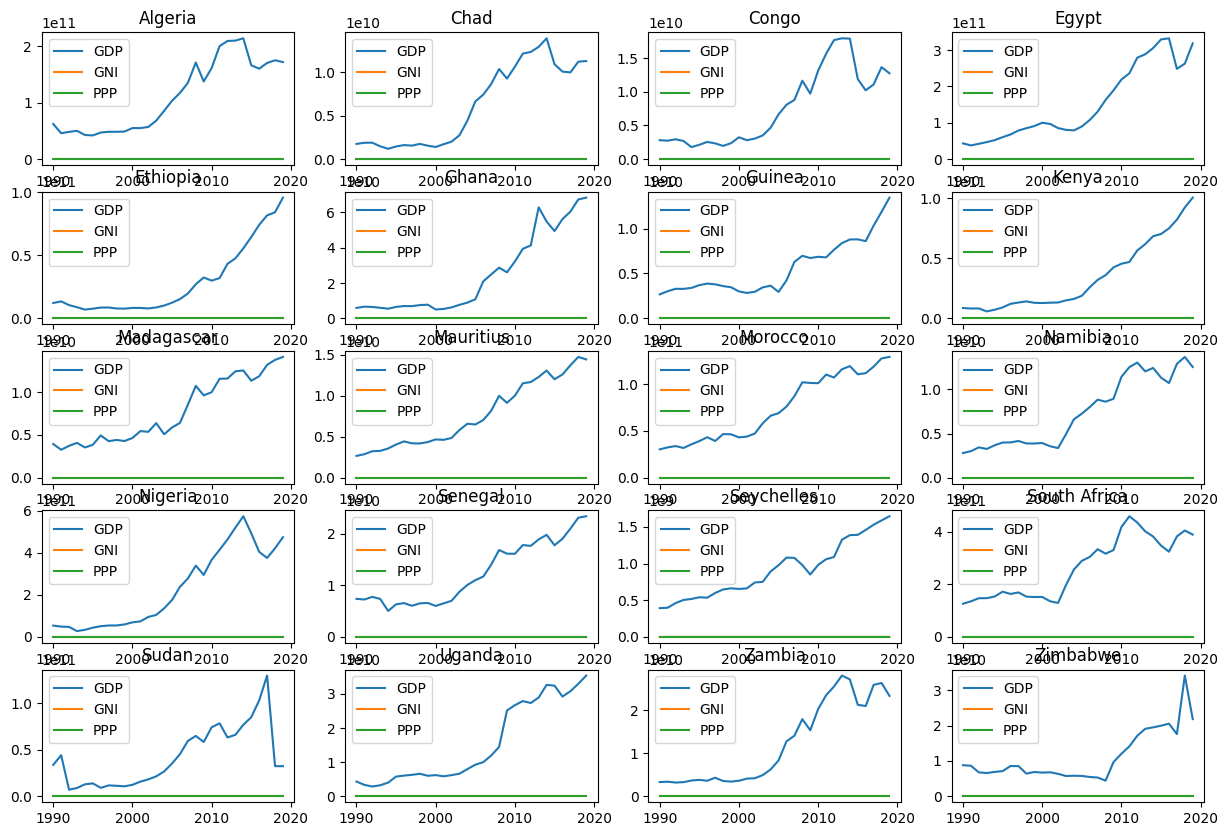

In [663]:
# for each country plot the GDP, GNI, PPP in separate plots
plt.figure(figsize=(15,10))
for i,country in enumerate(data['COUNTRY'].unique()):
    plt.subplot(5,4,i+1)
    temp = data[data['COUNTRY']==country]
    plt.plot(temp['YEAR'],temp['GDP'],label='GDP')
    plt.plot(temp['YEAR'],temp['GNI'],label='GNI')
    plt.plot(temp['YEAR'],temp['PPP'],label='PPP')
    plt.title(country)
    plt.legend()

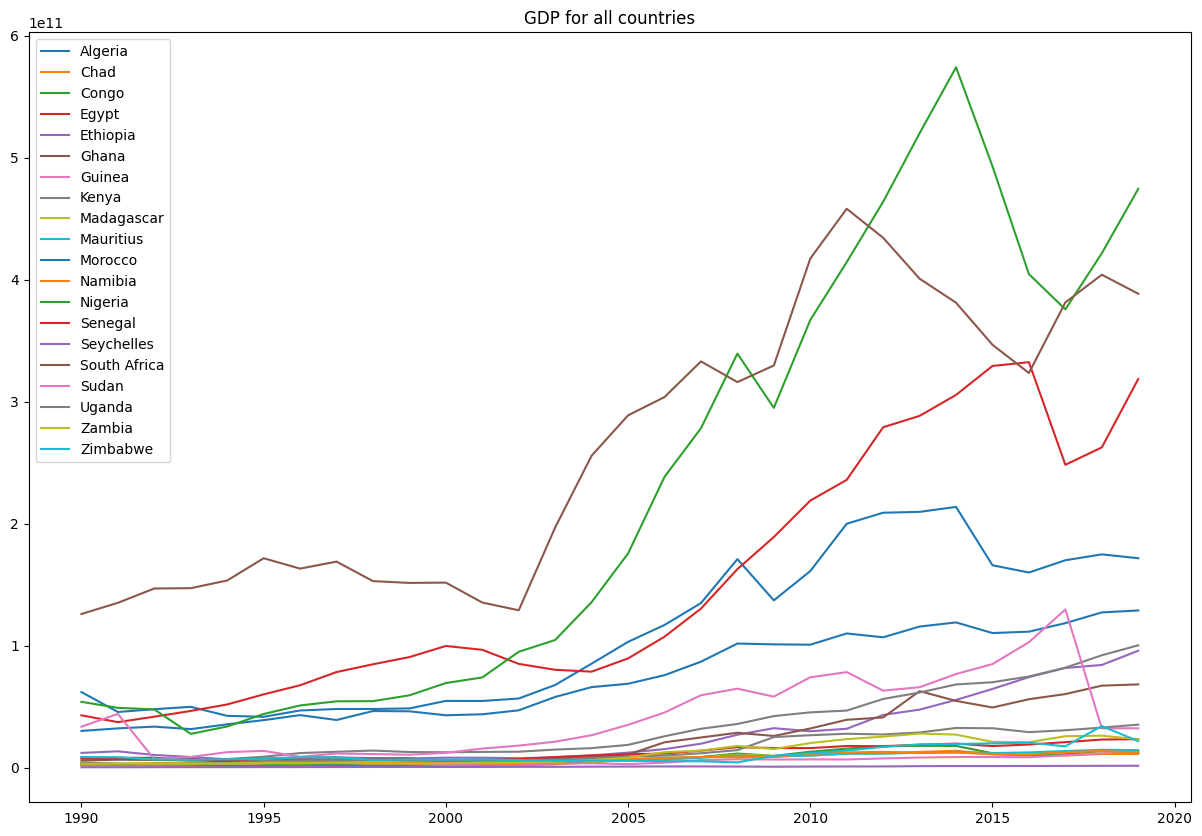

In [665]:
# plot the GDP for all countries in one plot
plt.figure(figsize=(15,10))
for i,country in enumerate(data['COUNTRY'].unique()):
    temp = data[data['COUNTRY']==country]
    plt.plot(temp['YEAR'],temp['GDP'],label=country)
plt.title('GDP for all countries')
plt.legend()

Text(0.5, 1.0, 'Average GDP, GNI, PPP for all countries')

<Figure size 1500x1000 with 0 Axes>

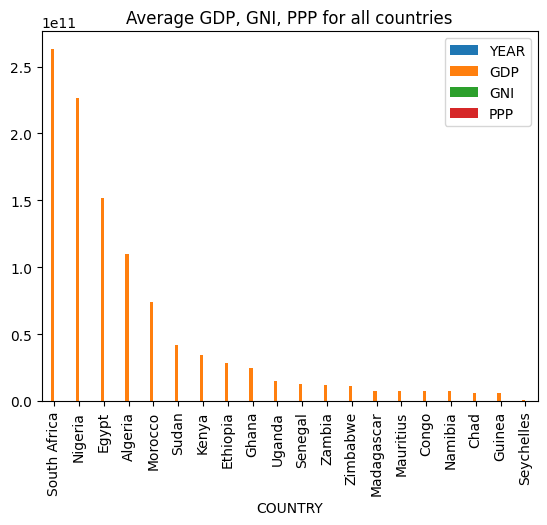

In [667]:
# for each country put average gdp, gni, ppp in bar chart in sorted order
plt.figure(figsize=(15,10))
temp = data.groupby('COUNTRY').mean().sort_values('GDP',ascending=False)
temp.plot(kind='bar')
plt.title('Average GDP, GNI, PPP for all countries')